# Ejemplos de PCA

## Ejemplo: Handwritten digits

Para ilustrar la descomposición de PCA y la reducción de dimensionalidad, usaremos el conjunto de datos MNIST de dígitos escritos a mano.

Desde deeplearningtutorial.net:

> El conjunto de datos MNIST consta de imágenes de dígitos escritas a mano y se divide en 60.000 ejemplos para el conjunto de entrenamiento y 10.000 ejemplos para las pruebas.
En muchos artículos, así como en este tutorial, el conjunto de entrenamiento oficial de 60,000 se divide en un conjunto de entrenamiento real de 50,000 ejemplos y 10,000 ejemplos de validación (para seleccionar hiperparámetros como la tasa de aprendizaje y el tamaño del modelo).
Todas las imágenes de dígitos se han normalizado en tamaño y se han centrado en una imagen de tamaño fijo de 28 x 28 píxeles.
En el conjunto de datos original, cada píxel de la imagen está representado por un valor entre 0 y 255, donde 0 es negro, 255 es blanco y cualquier elemento intermedio es un tono de gris diferente.

A continuación, se muestran algunos ejemplos de dígitos MNIST:

![](https://raw.githubusercontent.com/gperaza/UL-lecture-notes/master/Figures/mnist.png)

Para mayor comodidad, usaremos el conjunto de datos formato pickle de deeplearningtutorial.net.
El archivo pickle representa una tupla de 3 listas: el conjunto de entrenamiento, el conjunto de validación y el conjunto de prueba.
Cada una de las tres listas es un par formado a partir de una lista de imágenes y una lista de etiquetas de clase para cada una de las imágenes.
Una imagen se representa como una matriz unidimensional de 784 (28 x 28) valores flotantes entre 0 y 1 (0 significa negro, 1 para blanco).
Las etiquetas son números entre 0 y 9 que indican qué dígito representa la imagen.

Primero, importa los módulos que usaremos

In [1]:
import gzip
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
import urllib.request
from pathlib import Path
import numpy as np

Ahora, importemos el conjunto de datos

In [2]:
# The pickle database is already formated as to output training,
# validation and test sets.
# We first uncompress on the fly to avoid keeping the uncompressed
# database on disk

url = 'https://github.com/gperaza/UL-lecture-notes/blob/master/Data/mnist.pkl.gz?raw=true'
dfile = Path('mnist.pkl.gz')

# we only download the data once
if not dfile.is_file():
    urllib.request.urlretrieve(url, dfile)

pkl_file = gzip.open(dfile)
train_set, validation_set, test_set = pickle.load(pkl_file,
                                                  encoding='latin1')
pkl_file.close()

# Now we create a single data set from all three subsets
X = np.concatenate([train_set[0], validation_set[0], test_set[0]])
y = np.concatenate([train_set[1], validation_set[1], test_set[1]])

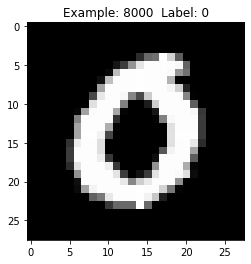

In [3]:
# Each row of a data matrix is a digit,
# the following function will be useful to visualize them.
def view_digit(example):
    label = y[example]
    image = X[example,:].reshape([28, 28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

view_digit(8000)

\En este ejemplo, trabajaremos exclusivamente con el dígito 3 para visualizar las componentes principales.

In [4]:
X3 = X[y == 3]

In [5]:
from sklearn.decomposition import PCA

# Lets keep only the first 49 principal components
# to make things quick.
# Initialize the class and obtain the components.
pca = PCA(n_components=49)
X_PCA = pca.fit_transform(X3)

Recuerde, los valores propios de la matriz de covarianza diagonalizada representan la cantidad de varianza que explica cada componente.
La suma de los primeros 49 valores propios nos da la varianza total explicada en las dimensiones reducidas.
Primero presentamos una gráfica de los valores propios, luego una gráfica de la varianza acumulada explicada hasta el componente $i$.

Fraction of variance explained by 49 principal components:  0.837889526039362


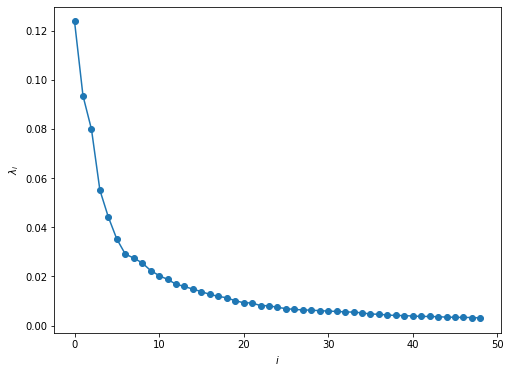

In [6]:
# Percentage of Variance Captured by 49 principal components
print("Fraction of variance explained by 49 principal components: ",
      sum(pca.explained_variance_ratio_))

# Plot of the eigenvaluas of the covariance matrix
plt.figure(figsize=(8,6))
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.ylabel(r'$\lambda_i$')
plt.xlabel(r'$i$');

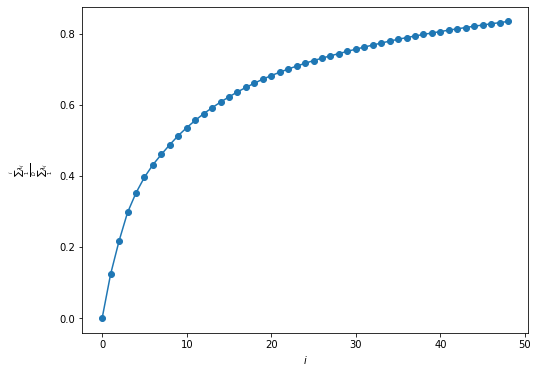

In [7]:
# Plot of the variance explained by the first n components
var_list = [sum(pca.explained_variance_ratio_[:i])
            for i in range(len(pca.explained_variance_ratio_))]
plt.figure(figsize=(8,6))
plt.plot(list(range(len(pca.explained_variance_ratio_))),
         var_list, '-o')
plt.xlabel(r'$i$')
plt.ylabel(r'$\frac{\sum_1^i\lambda_i}{\sum_1^D\lambda_i}$');

Ahora visualizamos los dos primeros componentes principales junto con observaciones clave ubicadas en cuantiles clave a lo largo de cada componente.

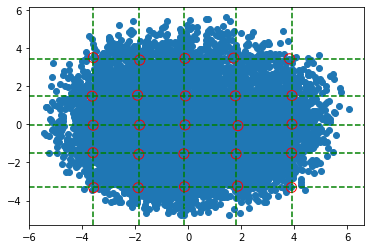

In [8]:
# Identify the 5%, 25%, 50%, 75%, 95% quantiles along both components
pc1 = X_PCA[:,0]
pc2 = X_PCA[:,1]

# Exact quantiles
qt1 = np.quantile(pc1, [0.05, 0.25, 0.5, 0.75, 0.95])
qt2 = np.quantile(pc2, [0.95, 0.75, 0.5, 0.25, 0.05])

# Plotting the first two principal components
plt.scatter(X_PCA[:,0], X_PCA[:,1])
# Quantile grid
for val in qt1:
    plt.axvline(val, color='green', linestyle='--')
for val in qt2:
    plt.axhline(val, color='green', linestyle='--')

# Nearest points to quantiles
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.argmin(dist_2)
# Create list of nearest points starting at top left corner
examples = []
for (y, x) in product(qt2, qt1):
    closest = closest_node((x, y), list(zip(pc1, pc2)))
    examples.append(closest)
    plt.scatter(pc1[closest], pc2[closest], facecolors='none', edgecolors='r', s=100)

Ahora visualizamos las observaciones encerradas en un círculo rojo en una matriz de la misma forma que en la gráfica. Observe cómo moverse de izquierda a derecha equivale a inclinar el dígito hacia la derecha (PC1), mientras que moverse de arriba a abajo cambia la forma del lóbulo inferior.

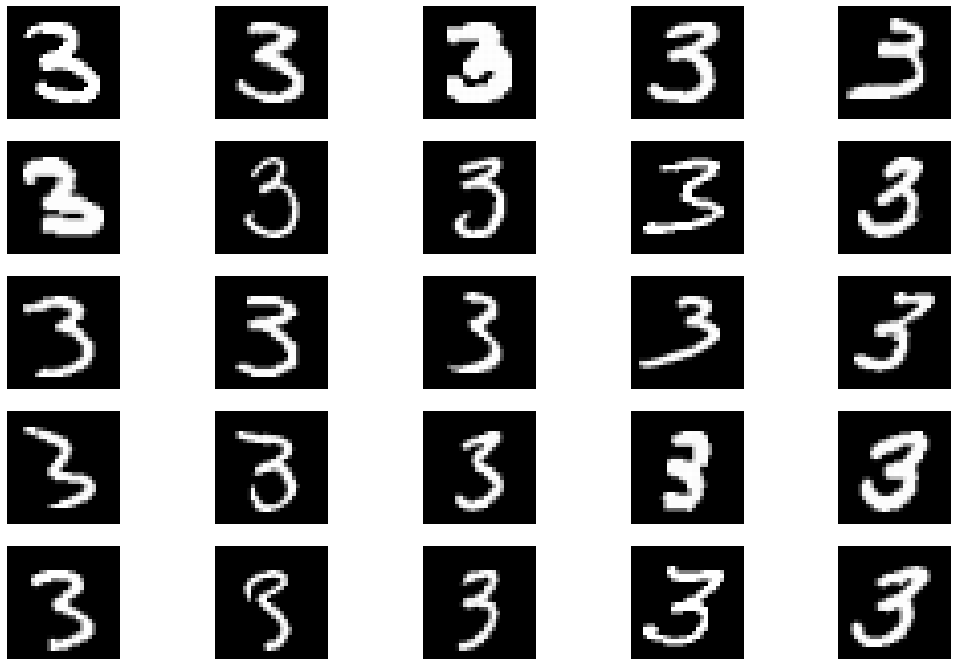

In [9]:
examples = np.array(examples).reshape(5,5)
fig, ax = plt.subplots(5, 5, figsize=(18,12))
for i, j in product(range(5), range(5)):
    image = X3[examples[i][j],:].reshape([28, 28])
    ax[i][j].axis('off')
    ax[i][j].imshow(image, cmap=plt.get_cmap('gray'))

Para comprender el efecto de cada componente, podemos pensar en cada dígito como una suma ponderada de los vectores unitarios $w_i$, con los pesos dados por los componentes principales de cada observación.
Por tanto, cada $w_i$ puede interpretarse como una imagen, y la suma ponderada de tales imágenes reconstruye cada dígito.
A continuación, graficamos los primeros 49 vectores $ w_i $.

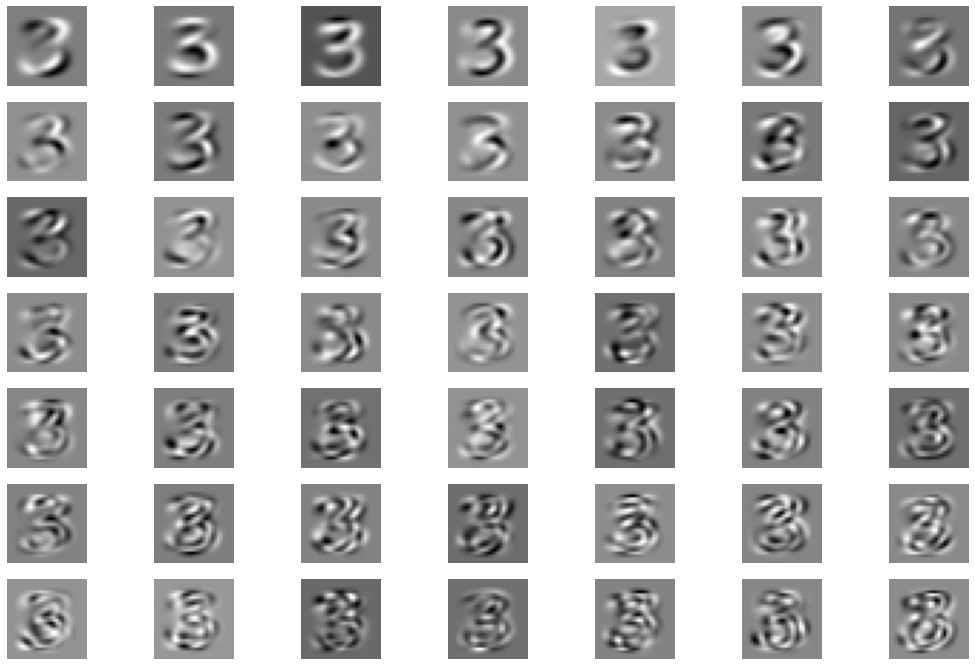

In [10]:
# A grid of the first 49 components
fig, ax = plt.subplots(7, 7, figsize=(18,12))
l = 0
for i, j in product(range(7), range(7)):
    base = pca.components_[l].reshape([28, 28])
    ax[i][j].axis('off')
    ax[i][j].imshow(base, cmap=plt.get_cmap('gray'))
    l += 1

Concéntrese en particular en los dos primeros componentes y en cómo reflejan los cambios discutidos anteriormente (inclinación y forma).

Para visualizar la reconstrucción, comenzamos con la media y posteriormente agregamos los componentes ponderados.
Resumamos los primeros 3 componentes para un solo ejemplo:

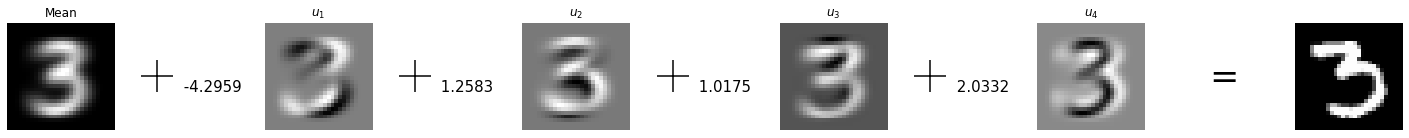

In [11]:
example = 100

X3_mean = np.mean(X3, axis=0)

fig, ax = plt.subplots(1, 11, figsize=(25,2))

ax[0].imshow(X3_mean.reshape([28,28]), cmap=plt.get_cmap('gray'))
ax[0].axis('off')
ax[0].set_title('Mean')

j = 0
for i in range(1, 9, 2):
    ax[i].scatter(0, 0, color='k', marker='+', s=1000)
    ax[i].text(0.05, -0.015, f' {X_PCA[example,j]:0.4f}', fontsize=15)
    ax[i].set_xlim(-0.05, 0.2)
    ax[i].axis('off')
    j += 1

j = 1
for i in range(2, 9, 2):
    ax[i].imshow(pca.components_[j-1].reshape([28,28]), cmap=plt.get_cmap('gray'))
    ax[i].axis('off')
    ax[i].set_title(rf'$u_{j}$')
    j += 1

ax[9].text(0.05, -0.04, '=', fontsize=35)
ax[9].set_xlim(-0.05, 0.2)
ax[9].set_ylim(-0.2, 0.2)
ax[9].axis('off')

ax[10].imshow(X3[example,:].reshape([28,28]), cmap=plt.get_cmap('gray'))
ax[10].axis('off');

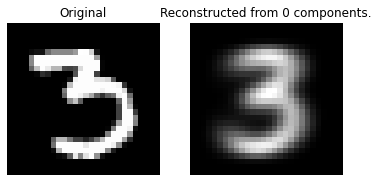

In [12]:
from matplotlib.animation import FuncAnimation
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

fig, ax = plt.subplots(1, 2)


def recons(m):
    rec = np.array(X3_mean, copy=True)
    vec = X_PCA[example, :m]
    for i,l in enumerate(vec):
        rec += l * pca.components_[i]
    ax[0].imshow(X3[example,:].reshape([28,28]), cmap=plt.get_cmap('gray'))
    ax[0].axis('off')
    ax[0].set_title('Original')
    ax[1].imshow(rec.reshape([28,28]), cmap=plt.get_cmap('gray'))
    ax[1].set_title(f'Reconstructed from {m} components.')
    ax[1].axis('off');

anim = FuncAnimation(fig, recons,
                     frames=np.arange(0, 50), interval=400)

anim.save('digit3_pca.gif', dpi=80, writer='pillow');

![](https://raw.githubusercontent.com/gperaza/UL-lecture-notes/master/Figures/digit3_pca.gif)

## Example: Whitening

Previously, we have seen that we can individually scale features to zero mean and unit variance to remove the scaling effects from the dataset.
Now we introduce a new transformation called **whitening** or **sphering**.
After whitening, additionally to unit variance, the covariance among features is set to zero.
To whiten an observation we define, for each data point $x_n$ , a transformed value given by

$$
y_n = L^{-1/2}W^T(x_n - \bar{x})
$$

where $W$ is the matrix with column eigenvectors from the PCA transform, and $\Lambda$ is the diagonalized covariance matrix.

It is easy to verify that this is just a PCA transform ($W^T \tilde{x}_n$) followed by normal standardization, since multiplying by $\Lambda^{-1/2}$ amounts to divide each columns by its standard deviation.
Transforming all observations at once can be done by

$$
Y = X_c W\Lambda^{-1/2} = \sqrt(n) UD D^{-1} = \sqrt(n) U
$$

where $D=\Lambda^{1/2}$ is the singular value matrix from the SVD, and $U$ is the matrix of left singular vectors.
It is easy to verify that the covariance matrix of the $y_{i}$ is the identity matrix, $\frac{1}{n}Y^T Y = U^T U = I$.

To understand the difference, we'll use the classic Old Faithful dataset.
The data set comprises 272 observations, each of which represents a single eruption and contains two variables corresponding to the duration in minutes of the eruption, and the time until the next eruption, also in minutes.

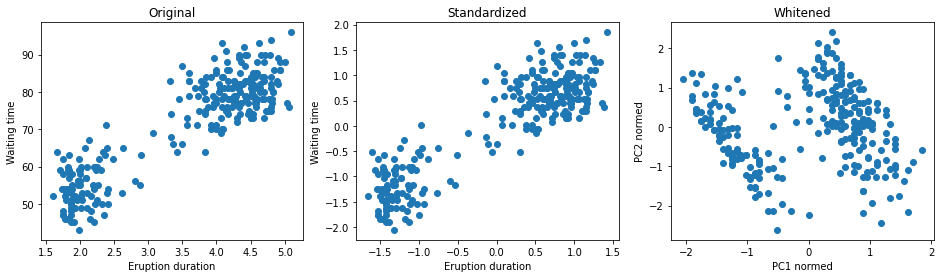

In [13]:
from sklearn.preprocessing import StandardScaler

url = 'https://github.com/gperaza/UL-lecture-notes/raw/master/Data/old-faithful.csv'
dfile = Path('old-faithful.csv')
if not dfile.is_file():
    urllib.request.urlretrieve(url, dfile)

old_f = np.loadtxt(dfile, delimiter=',')

fig, ax = plt.subplots(1, 3, figsize=(16,4))

# Original Data
ax[0].scatter(old_f[:,0], old_f[:,1])
ax[0].set_xlabel('Eruption duration')
ax[0].set_ylabel('Waiting time')
ax[0].set_title('Original')

# Standardizing
scaler = StandardScaler()
scaler.fit(old_f)
old_f_n = scaler.transform(old_f)
ax[1].scatter(old_f_n[:,0], old_f_n[:,1])
ax[1].set_xlabel('Eruption duration')
ax[1].set_ylabel('Waiting time')
ax[1].set_title('Standardized')
of_pca = PCA(n_components=2)
of_pca.fit(old_f_n)
pc1 = of_pca.components_[0]
pc2 = of_pca.components_[1]
l1, l2 = of_pca.explained_variance_
#ax[1].plot([],[],'-r')

# Whitened
# (Alternatively the compact SVD can be used, without computing PCA)
of_pca = PCA(n_components=2)
old_f_w = of_pca.fit_transform(old_f)
L = np.diag(of_pca.explained_variance_)
old_f_w = old_f_w @ np.sqrt(np.linalg.inv(L))
# Choose sign of PC so that plots resemble more
# Sign is an arbitrary choice in PCA
ax[2].scatter(-old_f_w[:,0], -old_f_w[:,1])
ax[2].set_xlabel('PC1 normed')
ax[2].set_ylabel('PC2 normed')
ax[2].set_title('Whitened');

Trough PCA, we obtained a whitening matrix $W\Lambda^{-1/2}$.
In reality, there exist infinitely many possible whitening matrices, since once the data is spherical any rotation wouldn't change the covariance matrix.
Another useful whitening matrix is the zero-phase component analysis whitening (ZCA) $W\Lambda^{-1/2}W^T = \Sigma^{-1/2}$, that rotates back the whitened data to the original basis.
This is useful, for example, in image analysis, where the ZCA whitened images resemble the orginal images more than the PCA whitened ones.


## Example: Visualization

On application of PCA, and dimensionality reduction in general, is that of visualization.
We can project the data to its first two PC, which retain most of the variance, and plot them to obtain a visual 2D representation of the data set.
We now plot the first two principal components of the MNIST data set for all digits.
Visualization without dimensionality reduction in data sets with many dimensions is very hard.
With PCA we hope to keep most of the structure of the data set in the first 2 or 3 dimensions, which allows us to visually inspect such structure in search for, for example, clusters.

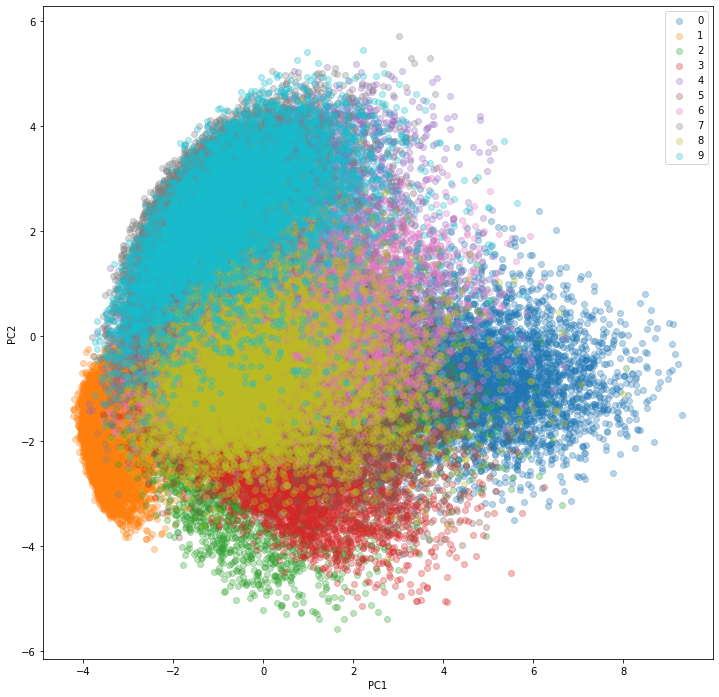

In [14]:
X = np.concatenate([train_set[0], validation_set[0], test_set[0]])
y = np.concatenate([train_set[1], validation_set[1], test_set[1]])

pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)
plt.figure(figsize=(12,12))
for i in range(10):
    Xd = X_PCA[y==i]
    plt.scatter(Xd[:,0], Xd[:,1], label=i, alpha=0.3)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2');

We can also visualize the Iris Data set.

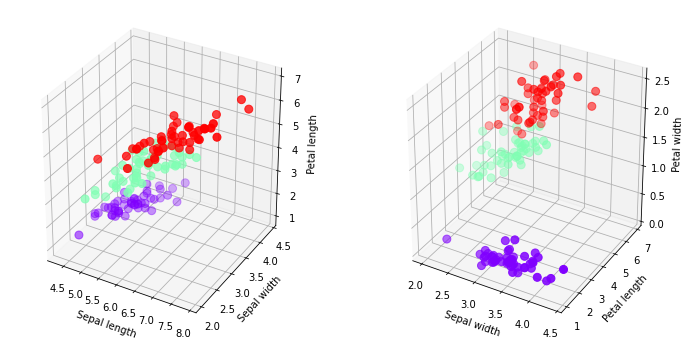

In [15]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Plot orginal features
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap='rainbow', c=y, s=8**2)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 3], cmap='rainbow', c=y, s=8**2)
ax.set_xlabel('Sepal width')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width');

In the next cell,we will apply your implementation of PCA to the iris data to reduce it to 2 dimensions and visualize the result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the "best" view.

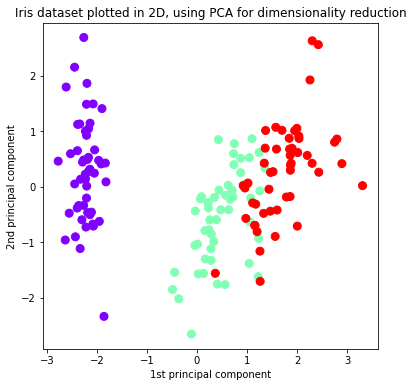

In [16]:
# Normalize previous to perform PCA.
# This way we perform PCA on the correlation matrix instead of the covariance matrix.
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

# PCA and project the data to 2D
pca = PCA()
pca.fit(X_norm)
U = np.stack(pca.components_, axis=-1)
S = pca.explained_variance_

Z = pca.transform(X_norm)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(Z[:, 0], Z[:, 1], cmap='rainbow', c=y, s=64)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_title('Iris dataset plotted in 2D, using PCA for dimensionality reduction');

We can see that in the PCA space, the variance is maximized along PC1 (explains 0.73% of the variance) and PC2 (explains 22% of the variance). Together, they explain 95%.

In [17]:
print(f'Explained variance per principal component: {S/S.sum()}')

Explained variance per principal component: [0.72962445 0.22850762 0.03668922 0.00517871]


The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance). Let's find the most important features:

In [18]:
print(abs(U))

[[0.52106591 0.37741762 0.71956635 0.26128628]
 [0.26934744 0.92329566 0.24438178 0.12350962]
 [0.5804131  0.02449161 0.14212637 0.80144925]
 [0.56485654 0.06694199 0.63427274 0.52359713]]


Remember the columns of U are the eigenvectors along the directions that maximize the variance. So, looking at the first principal component:

In [19]:
print(abs(U[:,0]))
print(abs(U[:,1]))

[0.52106591 0.26934744 0.5804131  0.56485654]
[0.37741762 0.92329566 0.02449161 0.06694199]


we can conclude that feature 1, 3 and 4 are the most important for PC1. Similarly, we can state that feature 2 and then 1 are the most important for PC2.

### The Biplot

> One of the most informative graphical representations of a multivariate dataset is via a biplot, which is fundamentally connected to the SVD of a relevant data matrix, and therefore to PCA.

Remember that an alternative way to approach PCA is through the decomposition:


$$
X_c = U D W^T,
$$

where the matrix $W$ contains the eigenvectors along the principal components as columns.

Under this decomposition, the matrix $U$ and the matrix product $V D^T$ contain information about the statistical correlation among features and observations. In a biplot, the first two columns of each $U$ and $W D^T$ are used to depict an approximated visual representation of such correlations. In particular, the rows of $U$ are plotted as points representing observations, while the rows of $W D^T$ are plotted as vectors representing features.

If the full set of eigenvectors is retained, the following points are true, in the biplot case, they remain approximately true, specially if the variance explained by the two first PC is large.

Points taken from cite:jolliffe2016principal:

- The cosine of the angle between any two vectors representing features is the coefficient of correlation between those features. This comes from the fact that the product $W D^T D W^T = n\Sigma$ is proportional to the covariance matrix.
- Similarly, the cosine of the angle between any vector representing a variable and the axis representing a given PC is the coefficient of correlation between those two variables.
- The inner product between the markers for observation $i$ and feature $j$ gives the (centred) value of observation $i$ on feature $j$. This is a direct result of the fact that $X_c = U D V^T$. The practical implication of this result is that orthogonally projecting the point representing observation $i$ onto the vector representing feature $j$ recovers the (centred) value $x_{ij} - \bar{x}_j$.
- The Euclidean distance between the markers for observations $i$ and $j$ is proportional to the Mahalanobis distance between them, since $U$ is proportional to the whitened data set.

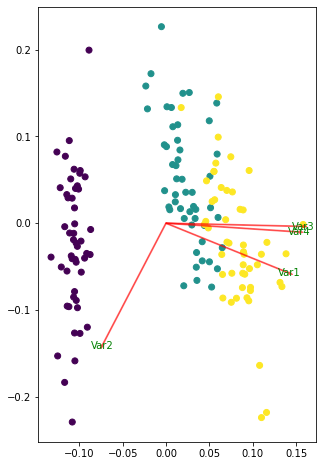

In [20]:
def biplot(X, labels=None):
    U, S, VT = np.linalg.svd(X)
    V = VT.T

    xs = U[:,0]
    ys = U[:,1]

    H = V @ np.diag(S).T
    scalex = np.max(abs(U[:,0]))/np.max(abs(H[:,0]))
    scaley = np.max(abs(U[:,1]))/np.max(abs(H[:,1]))
    scale = min(scalex, scaley)

    plt.figure(figsize=(8,8))
    plt.scatter(xs, ys, c = y)
    plt.gca().set_aspect('equal')

    for i, h in enumerate(H):
        plt.arrow(0, 0, H[i,0]*scale, H[i,1]*scale, color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(H[i,0]*scale, H[i,1]*scale, "Var" + str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(H[i,0]*scale, H[i,1]*scale, labels[i], color = 'g', ha = 'center', va = 'center')

biplot(X_norm)